1
김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64


2
[90]


3
이름	국어	합격여부
홍길동	90	A
이순신	90	A
임꺽정	55	D
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	D
김철수3	25	D


4
홍길동     120
이순신     120
임꺽정      75
정난정      80
이이      106
이황      110
정도전     106
김철수1    118
김철수2     60
김철수3     55
Name: 국어점수, dtype: int64


5.
정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64


6.
90    2
76    2
55    1
60    1
80    1
88    1
30    1
25    1
Name: 국어점수, dtype: int64


7
0~10	5	0	0	0.0
10~20	15	0	0	0.0
20~30	25	2	2	0.2
30~40	35	0	2	0.0
40~50	45	0	2	0.0
50~60	55	2	4	0.2
60~70	65	0	4	0.0
70~80	75	3	7	0.3
80~90	85	3	10	0.3
90~100	95	0	10	0.0


8


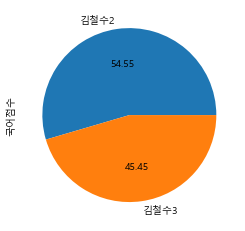



9
성	이름	국어
홍	길동	90
이	순신	90
임	꺽정	55
정	난정	60
이	이	76
이	황	80
정	도전	76
김	철수1	88
김	철수2	30
김	철수3	25


10
홍길동     90
이순신     90
김철수1    88
이황      80
이이      76
정도전     76
Name: 국어점수, dtype: int64 



11


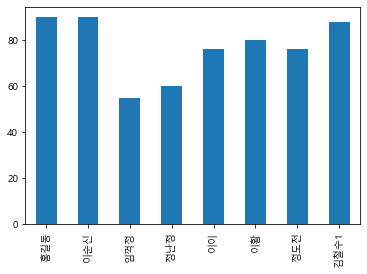



12
<bound method IndexOpsMixin.value_counts of 홍길동     (70, 100]
이순신     (70, 100]
임꺽정      (50, 70]
정난정      (50, 70]
이이      (70, 100]
이황      (70, 100]
정도전     (70, 100]
김철수1    (70, 100]
김철수2      (0, 50]
김철수3      (0, 50]
Name: 국어점수, dtype: category
Categories (3, interval[int64, right]): [(0, 50] < (50, 70] < (70, 100]]>


13.
이름	국어	합격여부
홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격




In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

sr = pd.Series( [90,90,55,60,76,80,76,88,30,25], name="국어점수")
sr.index = ['홍길동', '이순신', '임꺽정', '정난정', '이이', '이황', '정도전',
        '김철수1', '김철수2', '김철수3']

# 1. 이름순으로 정렬하시요
print('1')
temp = sr.sort_index(ascending=True)
print(temp)
print('\n')

# 2. 키보드로 입력받아 검색된 이름의 점수를 구하시요
# 이름:홍길동
# 70
print('2')
print(sr[sr.index.str.contains("홍길동")].values)
print('\n')


# 3. 데이터를 다음과 같이 출력하시요
def isPass(score) :
    if ((score >= 90) & (score <= 100)):
        return "A"
    elif ((score >= 80) & (score <= 89)):
        return "B"
    elif ((score >= 70) & (score <= 79)):
        return "C"
    elif ((score >= 60 & score <= 69)):
        return "D"
    else:
        return "F"
result = sr.apply(isPass)
print('3')
print('====================')
print('이름', '국어', '합격여부', sep='\t')
print('====================')
for a,b,c in zip(sr.index, sr, result):
    print (a, b, c, sep='\t')
# (0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
# ------------------------
#     이름    국어   학점
# ------------------------
#     홍길동  70	 C
#     ...
#     김철수3 25     F
print('\n')


# 4. 국어 점수 100점이하는 가산점10를 부여하고
#    국어 점수 70점이하는 가산점20를 부여하고
#    국어 점수 50점이하는 가산점30를 부여하시요
def giveScore(v) :
    if v<=50:
        return v + 30
    elif v<= 70:
        return v + 20
    else:
        return v + 30
print('4')
temp = sr.apply(giveScore)
print(temp)
print('\n')


# 5. 국어점수 25%~75% 사이에 해당하는 값을 구하시요
print('5.')
temp = sr.quantile([0.25, 0.75])
print(sr[ sr.between(temp.loc[0.25], temp.loc[0.75]) ])
print('\n')


# 6. 각 국어점수에 대한 갯수 를 구하시요.
print('6.')
print(sr.value_counts())
print('\n')

#!!!
# 7. 국어 점수를 10개로 분할한 경우 각 점수별 도수를 구하고 도수분포표를 그리시요
# 도수분포표
print('7')
#temp = pd.cut(sr, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
result = pd.cut(sr, list(range(0, 101, 10))
                , labels=['0~10','10~20', '20~30', '30~40', '40~50', '50~60',
                         '60~70', '70~80', '80~90', '90~100'])
result = result.value_counts().sort_index()
# 계급값 range(5,101, 10)
# 누적 도수 sr1.cumsum()
# 상대 도수 sr1/sr1.sum()

for a,b,c,d,e in zip(result.index, range(5,101, 10), result.values, result.cumsum(), result/result.sum()):
    print(a,b,c,d,e, sep='\t')
print('\n')


# 8. 국어점수 50점이하 점수에 대한 파이차트로 그리시요
print('8')
sr[sr<=50].plot(kind='pie', autopct='%.2f')
plt.show()
print('\n')

#!!!
# 9. 아래처럼 출력하시요( 성과 이름이 분리된 시리즈를 구하고 zip 을이용하여 구하시요 )
# ------------------------
#   성     이름    국어
# ------------------------
#   홍     길동    70	 
#     ...
#   김	    철수3   25    
print('9') 
print('=================')
print('성', '이름', '국어', sep='\t')
print('=================')
firstName = sr.index.str[0]
secondName = sr.index.str[1:]
for first, second, k in zip(firstName, secondName, sr):
    print(first, second, k, sep='\t')    
print('\n')


# 10. 국어점수 top 5를 구하시요
print('10')
print(sr.nlargest(5, keep='all'), '\n')
print('\n')


# 11. 국어점수가 50점이상인 데이터의 바차트를 그리시요
print('11')
sr[sr>=50].plot(kind='bar')
plt.show()
print('\n')

# 12. 국어점수의 범위(0~50,50~70,70~100)별 돗수를 구하시요 
# ( 범위, 0~50,50~70,70~100)
print('12')
print(pd.cut(sr, [0, 50, 70, 100]).value_counts)
print('\n')

# 13. 아래처럼 출력하시요(70점이상 합격 미만 불합격)
# ========================
# 이름     국어   합격여부
# =========================
# 홍길동   90      합격
# 이순신   90      합격
# ....
print('13.')
print('=================')
print('이름', '국어', '합격여부', sep='\t')
print('=================')
result = sr.apply(lambda v:'합격' if v>=70 else '불합격')
for n,k,l in zip(sr.index, sr, result) :
    print(n, k, l, sep='\t')
print('\n')
